# Determining Properties of Galaxies Using Machine Learning

---
## Jorge Bermeo, Nathanael Gutierrez, Tokhirjon Malikov

## Table of Contents
1. [Summary](#abstract)
1. [Learning Set](#learning-set)
1. [Predictions](#predictions)
    1. [Predicting age](#PREDICTING-AGE)
    1. [Predicting tau](#predicting-tau)
    1. [Predicting mass](#PREDICTING-MASS)
    1. [Predicting dust](#predicting-dust)
1. [Adding Noise](#adding-noise)
    1. [Age](#age-noise)
    1. [Tau](#tau-noise)
    1. [Mass](#mass-noise)
    1. [Dust](#dust-noise)
1. [References](#references)

---
## SUMMARY

SUMMARY GOES HERE

---

## LEARNING SET

SHORT DESCRIPTION OF OUR LEARNING SET GOES HERE

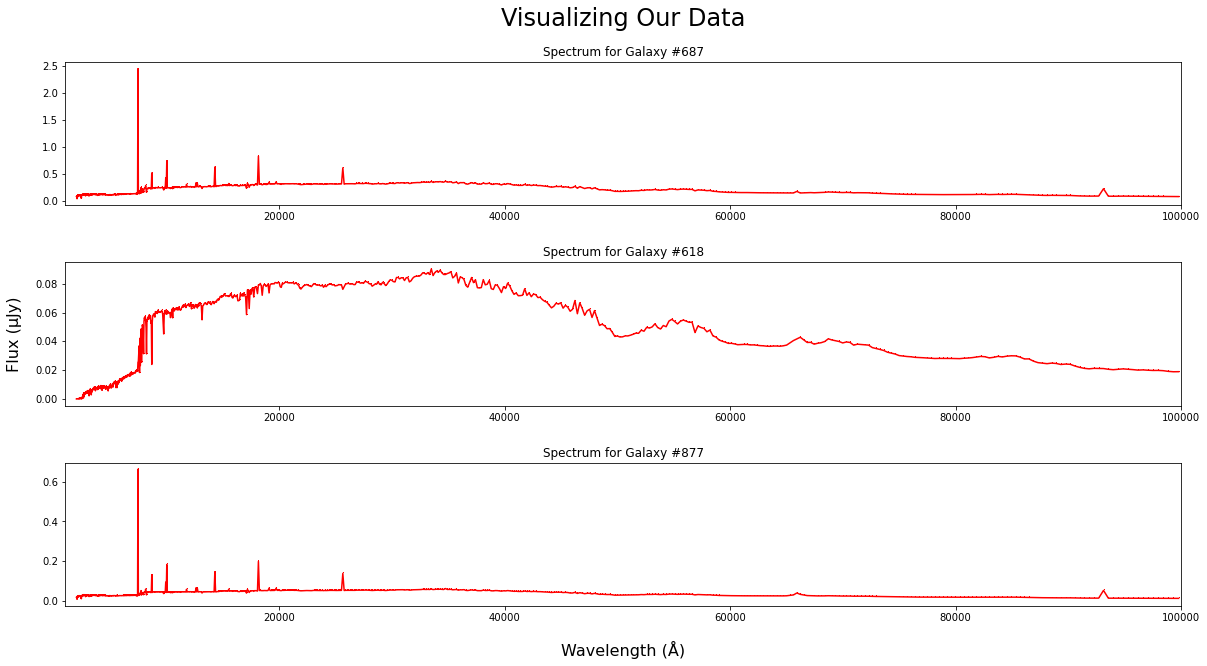

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)

random.seed(1010) # for reproducibility
rows = [random.randint(0, len(spectra)) for i in range(3)]  # select three random galaxy spectrums to visualize

plt.rcParams["figure.figsize"] = (20,10) #set size of plot

fig = plt.figure()
ax = fig.add_subplot(111) # Generating subplots for our figure; see https://stackoverflow.com/a/6981055/3135556
ax1 = fig.add_subplot(311) # 3 rows, 1 column, plot at position 1
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(wavelengths, spectra.loc[rows[0]], 'r,-')
ax2.plot(wavelengths, spectra.loc[rows[1]], 'r,-')
ax3.plot(wavelengths, spectra.loc[rows[2]], 'r,-')

ax1.set_xlim(1000, 100000) # restrict the x-axis to mitigate the gap that exists around x=0
ax2.set_xlim(1000, 100000)
ax3.set_xlim(1000, 100000)

# Set common labels
ax.set_xlabel("Wavelength (Å)", fontsize=16, labelpad=18)
ax.set_ylabel("Flux (μJy)", fontsize=16, labelpad=20)
ax.set_title("Visualizing Our Data", fontsize=24, pad=36)

ax1.set_title("Spectrum for Galaxy #" + str(rows[0]))
ax2.set_title("Spectrum for Galaxy #" + str(rows[1]))
ax3.set_title("Spectrum for Galaxy #" + str(rows[2]))

plt.subplots_adjust(hspace=0.4) # increase vertical distance between subplots

In [59]:
def plot_model_performance(x, y_expected, y_predicted, ylabel, **kwargs):
    params = {
        'actual_color': 'red',
        'predicted_color': 'blue',
        'actual_label': 'Actual values',
        'predicted_label': 'Predicted values',
        'title': 'Model Perfomance',
        'xlabel': 'log(sum(spectra))',
        'save_fig': False,
        'save_fig_as': ''
    }
    
    for key, value in kwargs.items():
        if key not in params:
            raise ValueError("Keyword argument '" + key + "' not in list of acceptable parameters.")
        params[key] = value
    
    fig, ax = plt.subplots()
    ax.scatter(X, y_expected, color=params['actual_color'], label=params['actual_label'])
    plt.scatter(X, y_predicted, color=params['predicted_color'], label=params['predicted_label'])
    ax.legend()
    ax.set_title(params['title'], fontsize=16)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(params['xlabel'])
    
    if params['save_fig']:
        if params['save_fig_as'] == '':
            params['save_fig_as'] = 'Model Performance - ' + params['title']
        fig.savefig(params['save_fig_as'], dpi=300)

## PREDICTING AGE

SHORT BLURB GOES HERE

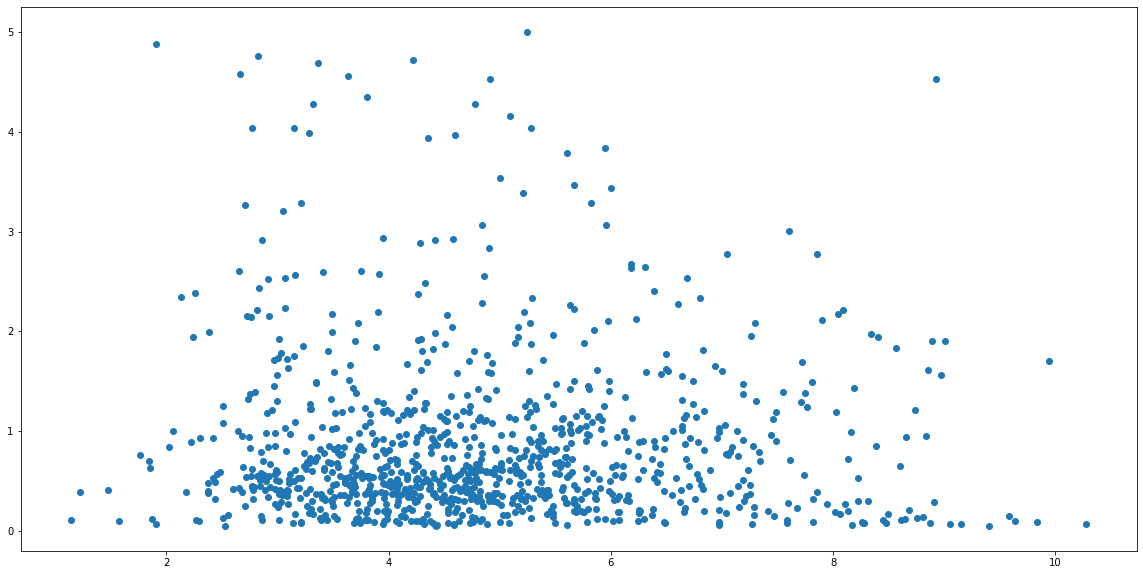

In [3]:
# TODO: ADD LABELS, TITLES TO GRAPH

ages = galaxy_properties['age']
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, ages)

0.6926516982368061
0.21846968663353358


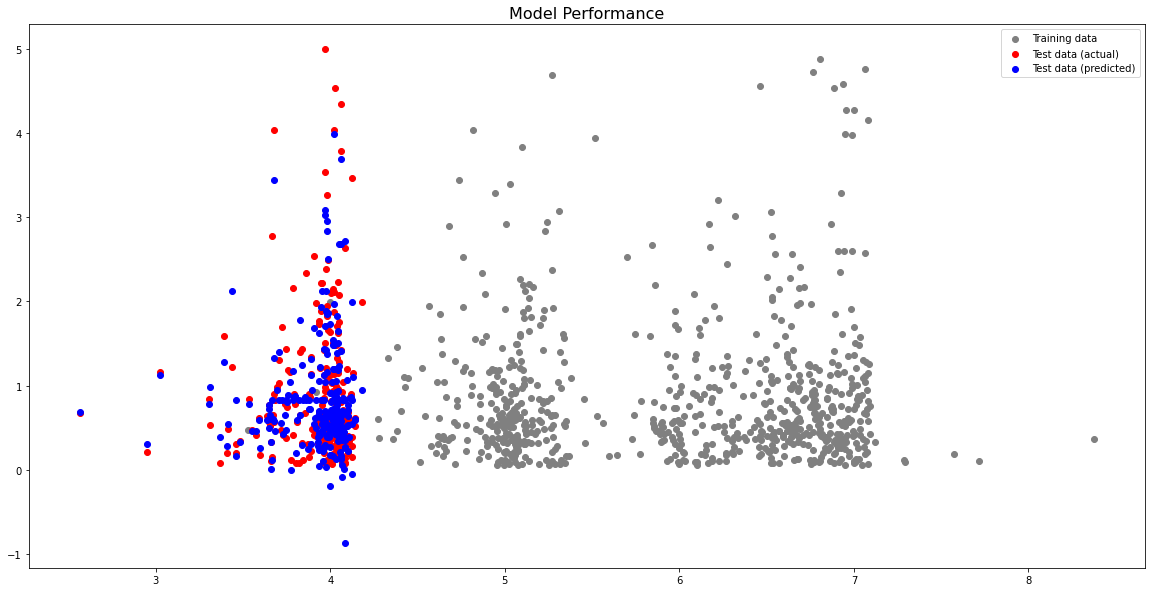

In [62]:
# TODO: LABEL GRAPH AND BEAUTIFY
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(spectra, ages, random_state=101)
age_model = SVR(C=2300, gamma=0.08, kernel='rbf')
age_model.fit(X_train, y_train)
print(r2_score(y_test, age_model.predict(X_test)))
print(mean_squared_error(y_test, age_model.predict(X_test)))

X = np.empty(len(X_train))
for i in range(len(X_train)):
    X[i] = np.log(np.sum(X_train[i]))
    
X2 = np.empty(len(X_test))
for i in range(len(X_test)):
    X2[i] = np.log(np.sum(X_test[i]))

fig, ax = plt.subplots()
ax.scatter(X, y_train, color='gray', label='Training data')
ax.scatter(X2, y_test, color='red', label='Test data (actual)')
ax.scatter(X2, age_model.predict(X_test), color='blue', label='Test data (predicted)')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
plt.show()
fig.savefig("model_perfomance", dpi=300)

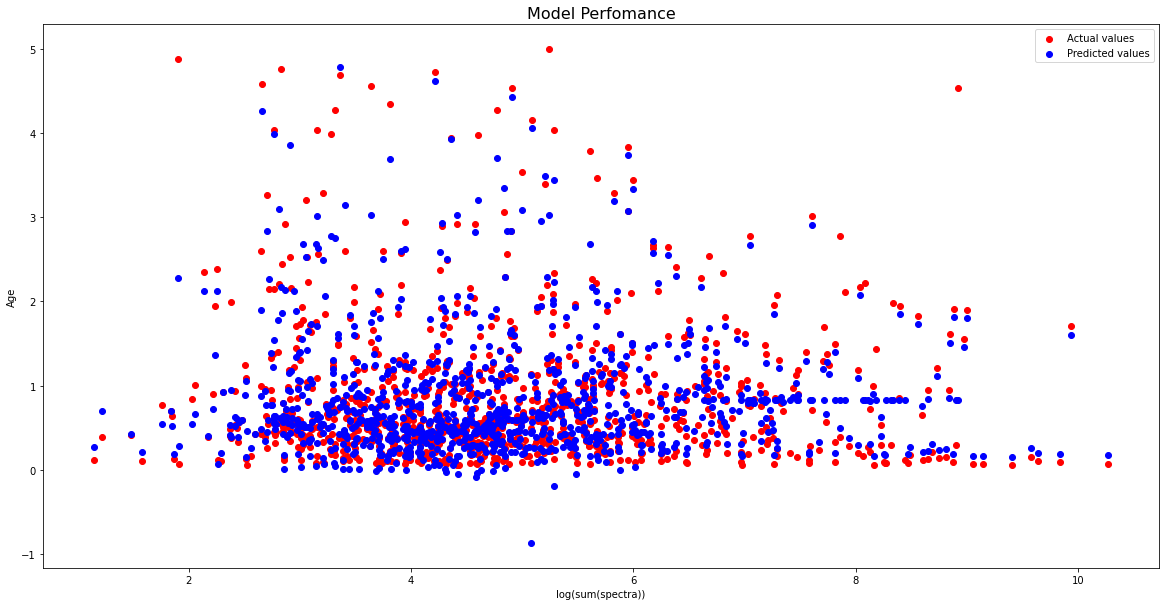

In [64]:
# TODO: LABEL GRAPH AND BEAUTIFY
# TODO: 

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plot_model_performance(X, ages, age_model.predict(spectra), 'Age')

## PREDICTING MASS

SHORT BLURB GOES HERE

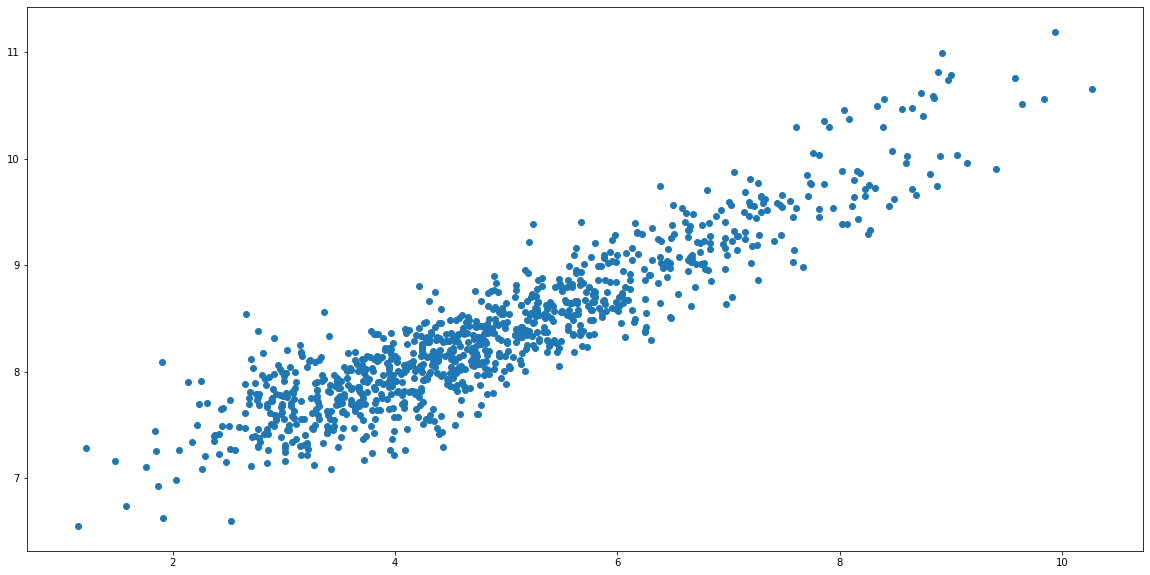

In [65]:
# TODO: LABEL GRAPH
mass = galaxy_properties['mass']

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, mass)

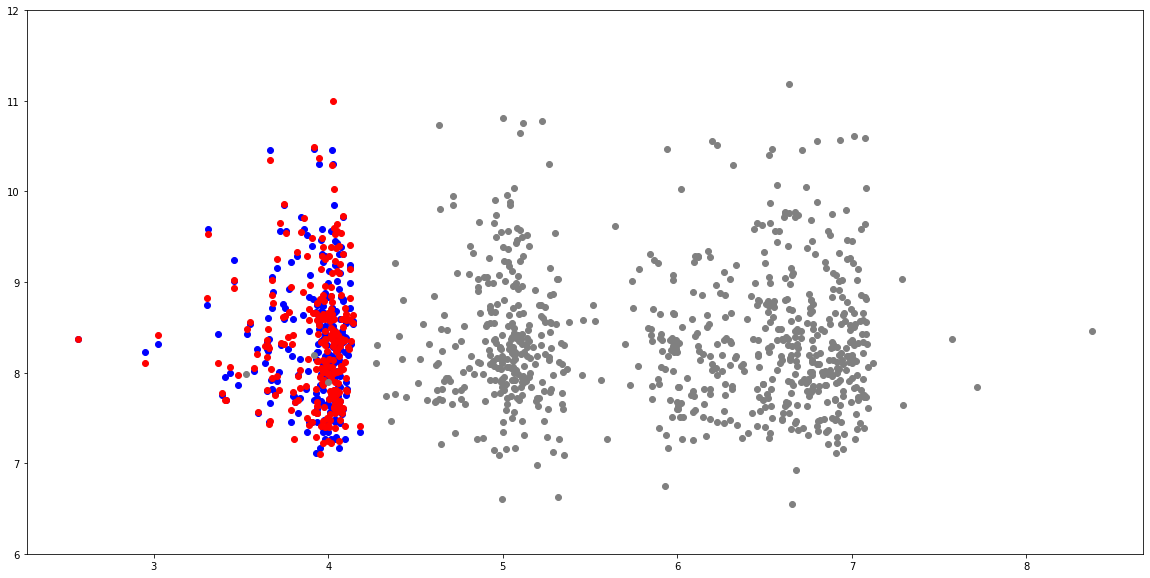

In [66]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(spectra, mass, random_state = 101)
mass_model = DecisionTreeRegressor(max_features=803)
mass_model.fit(X_train, y_train)

prediction = mass_model.predict(X_test)

X = np.empty(len(X_test))
X2 = np.empty(len(X_train))

for i in range(len(X_test)):
    X[i] = np.log(np.sum(X_test[i]))
    
for i in range(len(X_train)):
    X2[i] = np.log(np.sum(X_train[i]))

plt.ylim(6, 12)
plt.scatter(X, prediction, c='blue')
plt.scatter(X, y_test, c='red')
plt.scatter(X2, y_train, c='grey')

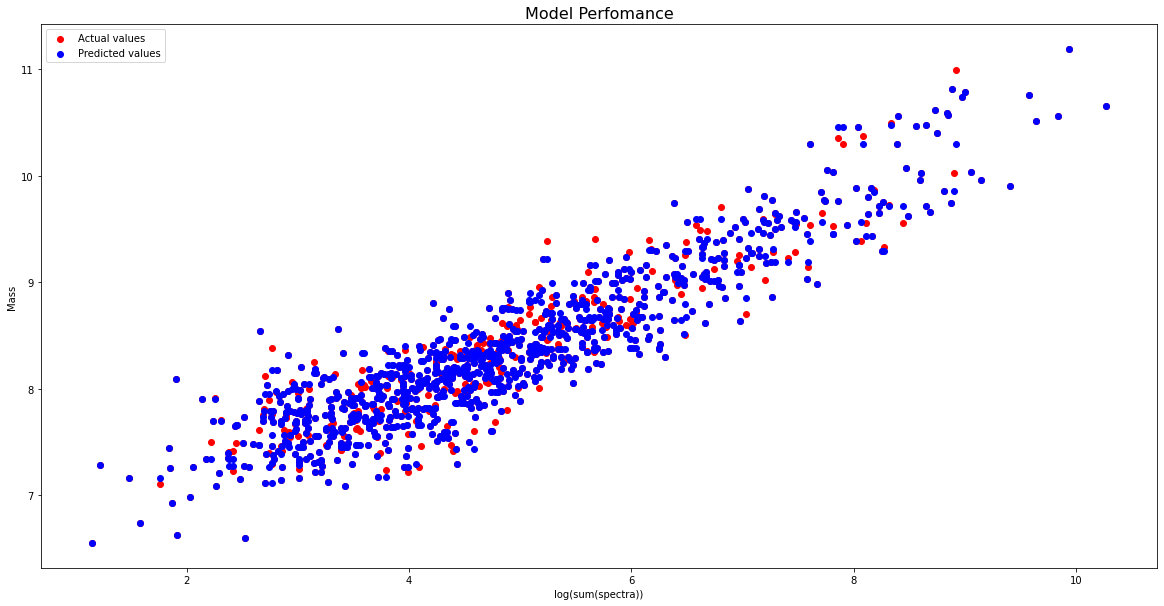

In [67]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plot_model_performance(X, mass, mass_model.predict(spectra), 'Mass')

## ADDING NOISE

In [68]:
import scipy.stats

def add_noise(df, percent):
    """
    Add a percetange of noise to a Pandas DataFrame.
    Returns a new Pandas DataFrame containing the noise.
    
    Positional arguments:
    - df : a Pandas DataFrame
    - percent: percentage of noise desired, as a float. 
               For example, a value of 0.10 is 10%. 
               Similarly a value of 1.15 is 115%. 
    """
    ndf = pd.DataFrame()
    for i in range(len(df.columns)):
        mean = df[i] * percent
        gauss_dist = scipy.stats.norm.rvs(loc=mean, scale=0.000001, size=1000)
        ndf[i] = df[i] + gauss_dist
        
    return ndf

In [69]:
spectra_1 = add_noise(spectra, 0.01)
spectra_5 = add_noise(spectra, 0.05)
spectra_10 = add_noise(spectra, 0.1)

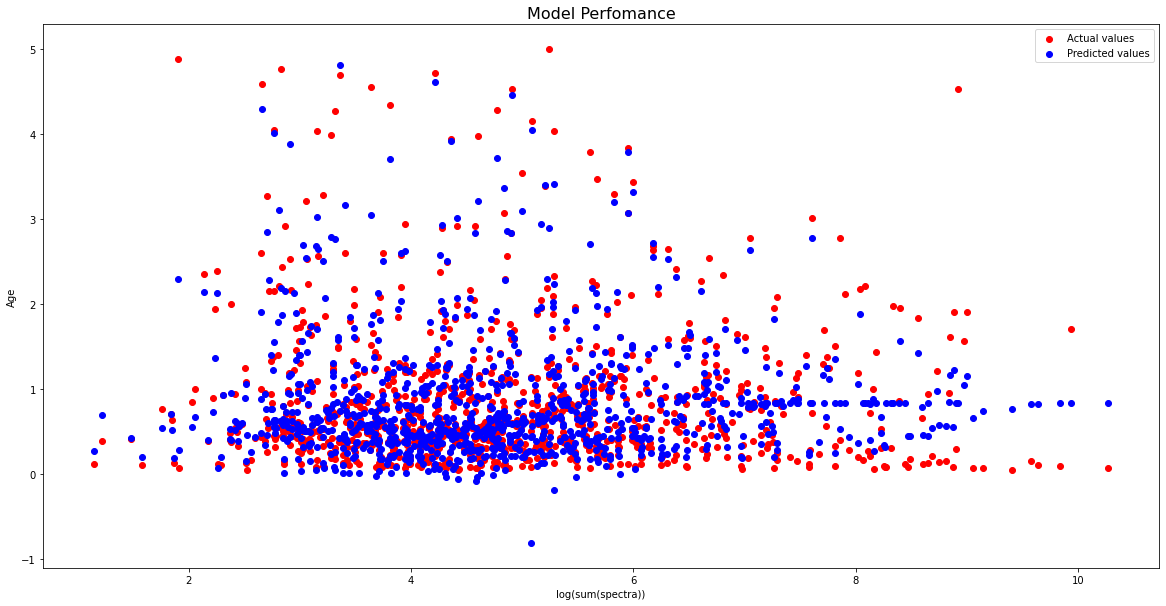

In [73]:
plot_model_performance(X, ages, age_model.predict(spectra_1), 'Age')

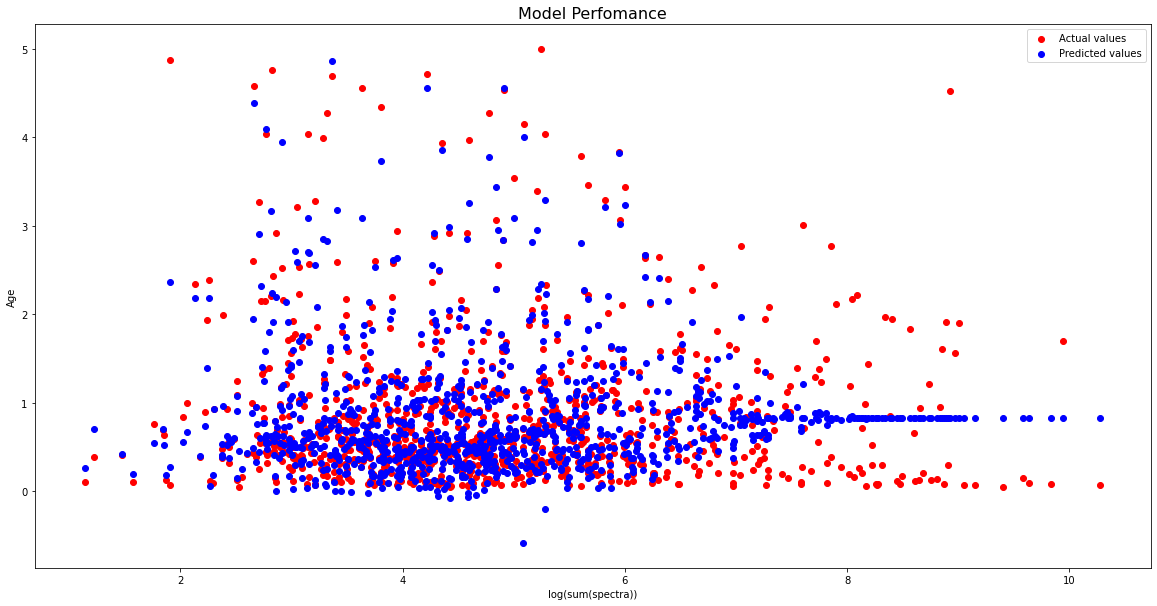

In [74]:
plot_model_performance(X, ages, age_model.predict(spectra_5), 'Age')

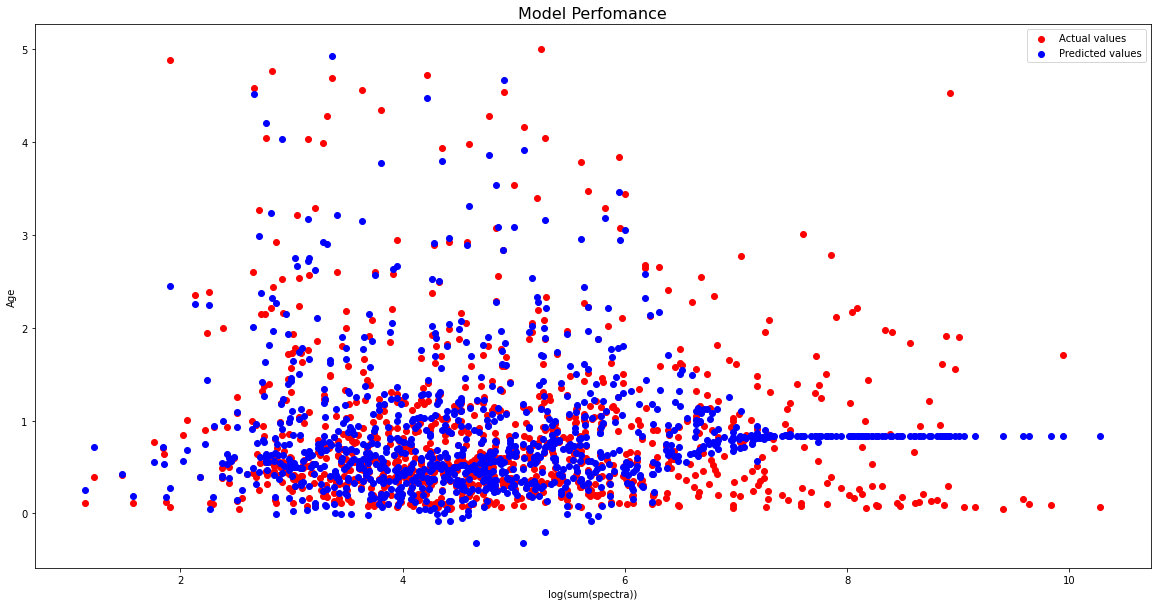

In [75]:
plot_model_performance(X, ages, age_model.predict(spectra_10), 'Age')

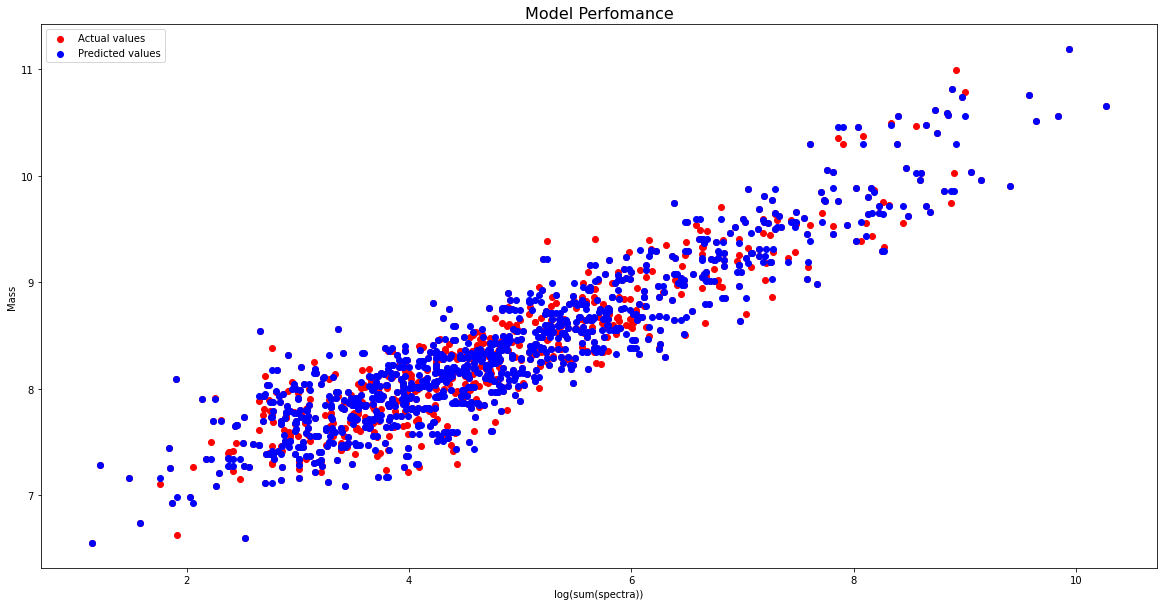

In [70]:
plot_model_performance(X, mass, mass_model.predict(spectra_1), 'Mass')

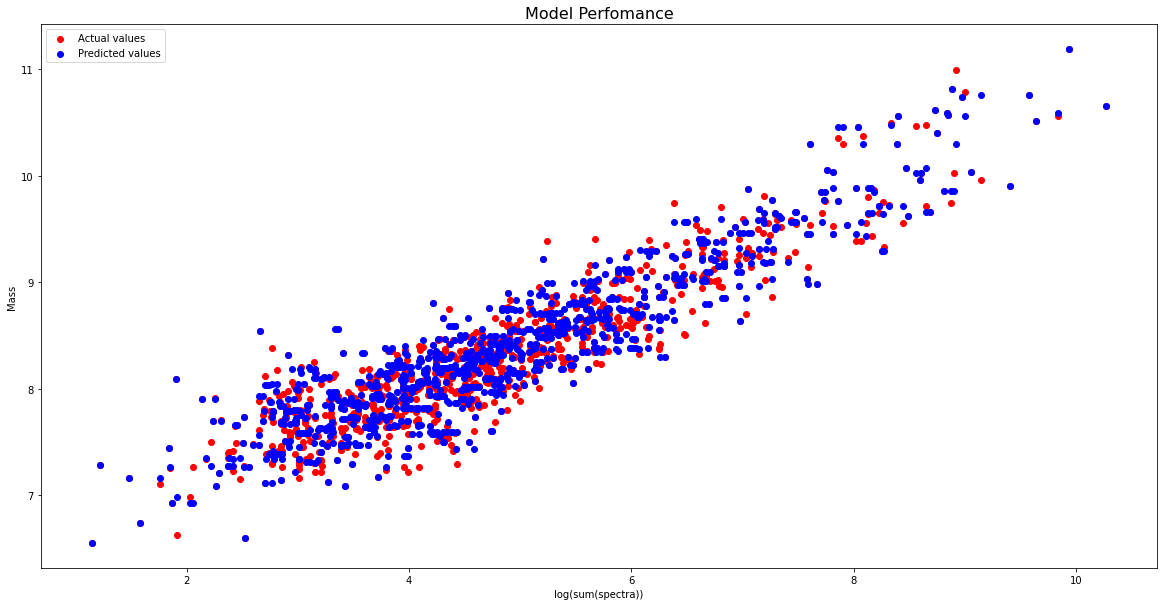

In [71]:
plot_model_performance(X, mass, mass_model.predict(spectra_5), 'Mass')

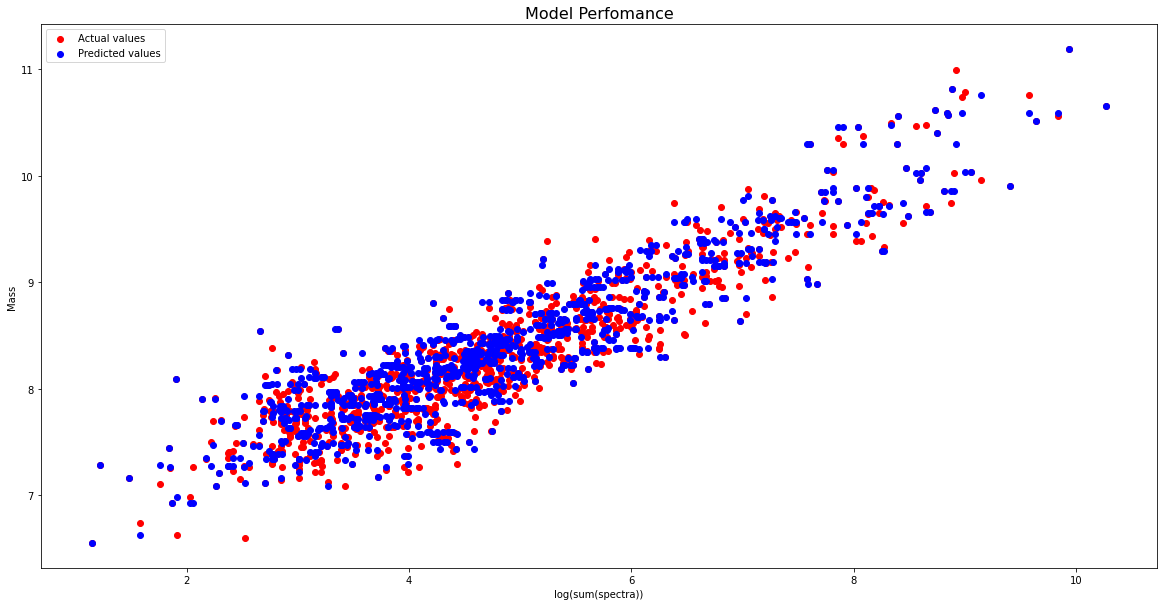

In [72]:
plot_model_performance(X, mass, mass_model.predict(spectra_10), 'Mass')